<a href="https://colab.research.google.com/github/edisonwang03/seoul-bike-sharing-demand/blob/main/Seoul_Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seoul Bike-Sharing Demand

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [110]:
print("Working")

Working


## Set-Up

In [111]:
import sys
import sklearn
from packaging import version

assert sys.version_info >= (3,7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [112]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Data/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Quick Look

In [113]:
df.columns=['Date','Rent_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'DPT',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day']

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Rent_Bike_Count  8760 non-null   int64  
 2   Hour             8760 non-null   int64  
 3   Temperature      8760 non-null   float64
 4   Humidity         8760 non-null   int64  
 5   Wind_speed       8760 non-null   float64
 6   Visibility       8760 non-null   int64  
 7   DPT              8760 non-null   float64
 8   Solar_Radiation  8760 non-null   float64
 9   Rainfall         8760 non-null   float64
 10  Snowfall         8760 non-null   float64
 11  Seasons          8760 non-null   object 
 12  Holiday          8760 non-null   object 
 13  Functioning_Day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [115]:
df.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [116]:
df.describe()

,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


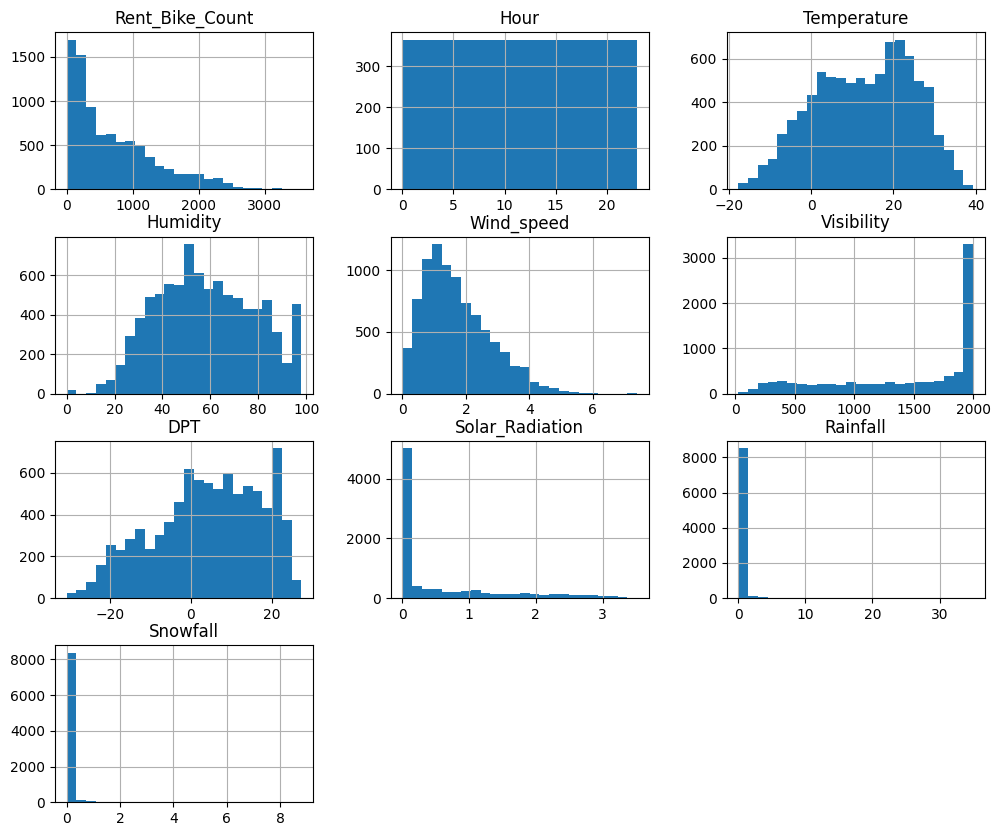

In [117]:
import matplotlib.pyplot as plt

df.hist(bins=24,figsize=(12,10))
plt.show() # Visibility, Solar Radiation, Rainfall, and Snowfall are heavily skewed. May instead use categories rather than numerical values

## Creating Training/Test Sets

In [64]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df["Hour"], random_state=42)
df["Hour"].value_counts().sort_index() / len(df)

0     0.041667
1     0.041667
2     0.041667
3     0.041667
4     0.041667
5     0.041667
6     0.041667
7     0.041667
8     0.041667
9     0.041667
10    0.041667
11    0.041667
12    0.041667
13    0.041667
14    0.041667
15    0.041667
16    0.041667
17    0.041667
18    0.041667
19    0.041667
20    0.041667
21    0.041667
22    0.041667
23    0.041667
Name: Hour, dtype: float64

In [65]:
train_set["Hour"].value_counts().sort_index() / len(train_set)

0     0.041667
1     0.041667
2     0.041667
3     0.041667
4     0.041667
5     0.041667
6     0.041667
7     0.041667
8     0.041667
9     0.041667
10    0.041667
11    0.041667
12    0.041667
13    0.041667
14    0.041667
15    0.041667
16    0.041667
17    0.041667
18    0.041667
19    0.041667
20    0.041667
21    0.041667
22    0.041667
23    0.041667
Name: Hour, dtype: float64

In [66]:
test_set["Hour"].value_counts().sort_index() / len(test_set)

0     0.041667
1     0.041667
2     0.041667
3     0.041667
4     0.041667
5     0.041667
6     0.041667
7     0.041667
8     0.041667
9     0.041667
10    0.041667
11    0.041667
12    0.041667
13    0.041667
14    0.041667
15    0.041667
16    0.041667
17    0.041667
18    0.041667
19    0.041667
20    0.041667
21    0.041667
22    0.041667
23    0.041667
Name: Hour, dtype: float64

In [67]:
test_set.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
430,18/12/2017,160,22,1.5,82,2.4,537,-1.2,0.00,0.0,2.6,Winter,No Holiday,Yes
8140,05/11/2018,107,4,8.0,81,0.4,666,4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8461,18/11/2018,905,13,9.9,37,2.1,1900,-4.1,1.32,0.0,0.0,Autumn,No Holiday,Yes
3495,25/04/2018,1180,15,22.8,21,2.1,1542,-0.6,2.75,0.0,0.0,Spring,No Holiday,Yes
7185,26/09/2018,680,9,17.7,54,1.8,2000,8.2,0.63,0.0,0.0,Autumn,No Holiday,Yes


## Visualizing Trends (Testing)

In [129]:
dummy_df = df.copy()

In [130]:
corr_matrix = dummy_df.corr()
corr_matrix["Rent_Bike_Count"].sort_values(ascending=False)

<ipython-input-130-b6c2951394b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dummy_df.corr()


Rent_Bike_Count    1.000000
Temperature        0.538558
Hour               0.410257
DPT                0.379788
Solar_Radiation    0.261837
Visibility         0.199280
Wind_speed         0.121108
Rainfall          -0.123074
Snowfall          -0.141804
Humidity          -0.199780
Name: Rent_Bike_Count, dtype: float64

In [131]:
for col in ['Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']:
  print(dummy_df[col].value_counts()) # Each of these categories are primarily one value

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: Visibility, Length: 1789, dtype: int64
0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: Solar_Radiation, Length: 345, dtype: int64
0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall, Length: 61, dtype: int64
0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9 

In [132]:
dummy_df['IsVisibility']=dummy_df['Visibility'].apply(lambda x: 1 if x>=2000 else 0)
dummy_df['IsRainfall']=dummy_df['Rainfall'].apply(lambda x:1 if x>=0.148687 else 0)
dummy_df['IsSnowfall']=dummy_df['Snowfall'].apply(lambda x:1 if x>=0.075068 else 0)
dummy_df['IsSolar_Radiation']=dummy_df['Solar_Radiation'].apply(lambda x:1 if x>=0.56911 else 0)

dummy_df['Functioning_Day']=dummy_df['Functioning_Day'].map({'Yes':1,'No':0})
dummy_df['IsHoliday']=dummy_df['Holiday'].map({'No Holiday':0,'Holiday':1})

dummy_df['Date'] = pd.to_datetime(dummy_df['Date'])
dummy_df['Day']=dummy_df['Date'].dt.day
dummy_df['Month']=dummy_df['Date'].dt.month
dummy_df['Year']=dummy_df['Date'].dt.year

dummy_df.drop(['Date', 'Visibility','Rainfall','Snowfall','Solar_Radiation','Holiday'],axis=1,inplace=True)

<ipython-input-132-da793ddde668>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dummy_df['Date'] = pd.to_datetime(dummy_df['Date'])


In [133]:
dummy_df.Functioning_Day.value_counts()

1    8465
0     295
Name: Functioning_Day, dtype: int64

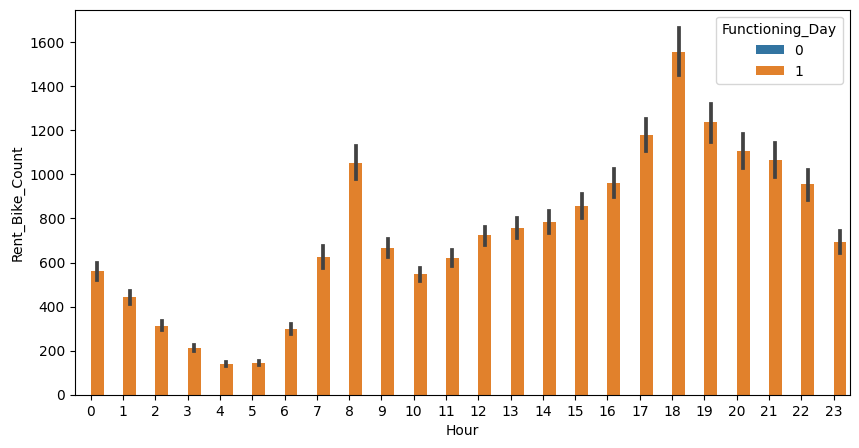

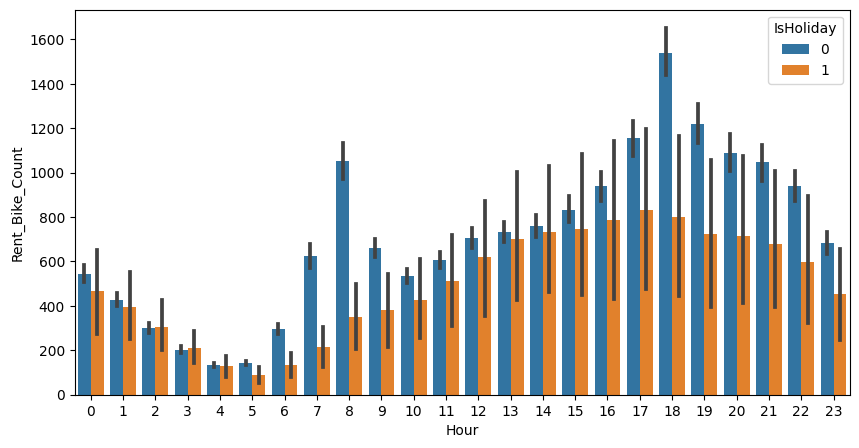

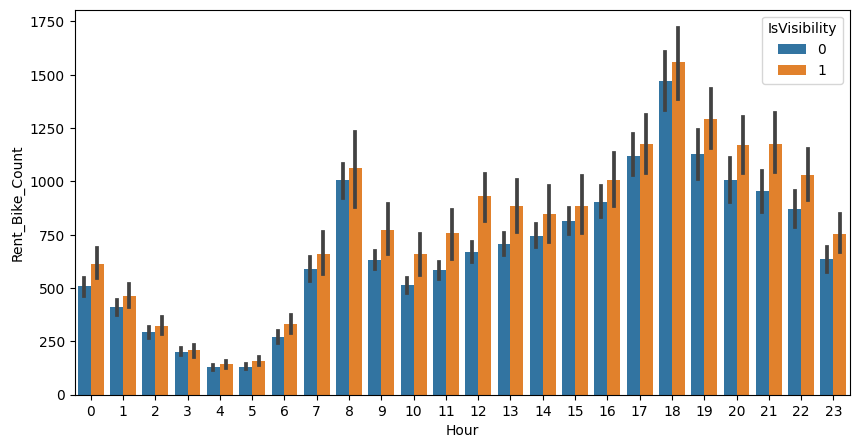

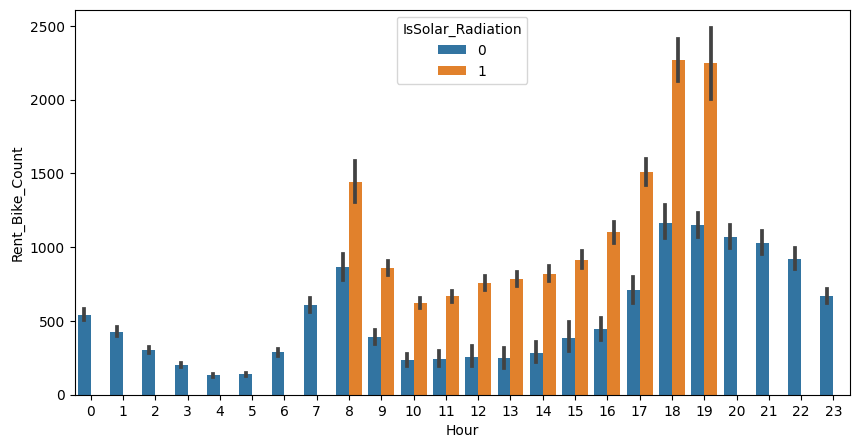

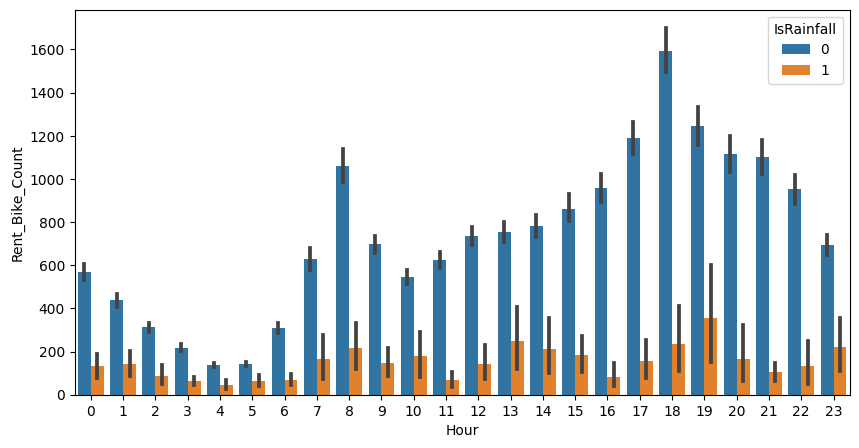

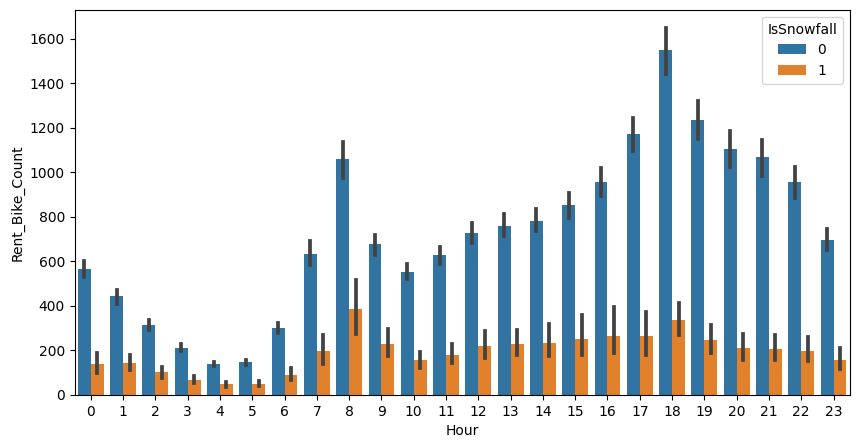

In [138]:
import seaborn as sns

for col in ['Functioning_Day', 'IsHoliday', 'IsVisibility', 'IsSolar_Radiation', 'IsRainfall', 'IsSnowfall']:
  plt.figure(figsize=(10,5))
  sns.barplot(x='Hour',y='Rent_Bike_Count',hue=col,data=dummy_df)

# No bikes are rented on non-functioning days
# People do not bike as much on holiday
# People are unaffected by visibility
# People prefer to bike when it is sunny
# People prefer to bike when it is not raining
# People prefer to bike when it is not snowing

In [142]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rent_Bike_Count    8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   DPT                8760 non-null   float64
 6   Seasons            8760 non-null   object 
 7   Functioning_Day    8760 non-null   int64  
 8   IsVisibility       8760 non-null   int64  
 9   IsRainfall         8760 non-null   int64  
 10  IsSnowfall         8760 non-null   int64  
 11  IsSolar_Radiation  8760 non-null   int64  
 12  IsHoliday          8760 non-null   int64  
 13  Day                8760 non-null   int64  
 14  Month              8760 non-null   int64  
 15  Year               8760 non-null   int64  
dtypes: float64(3), int64(12)

<Axes: xlabel='Hour', ylabel='Rent_Bike_Count'>

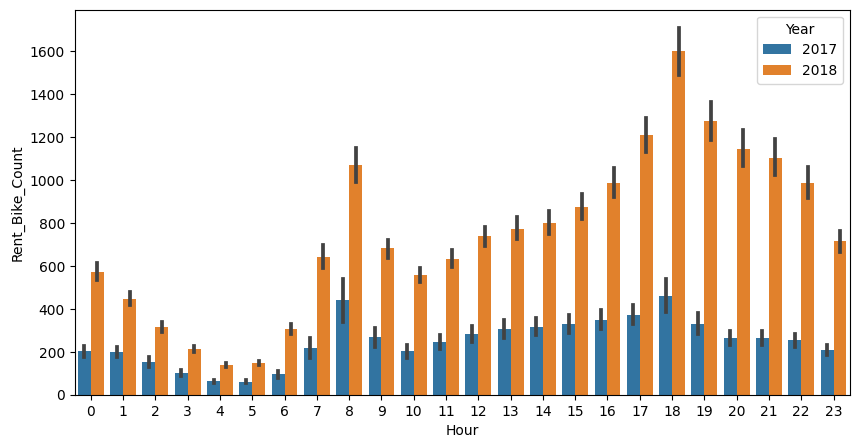

In [141]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rent_Bike_Count',hue='Year',data=dummy_df)
# Increase in bike usage from 2017 to 2018

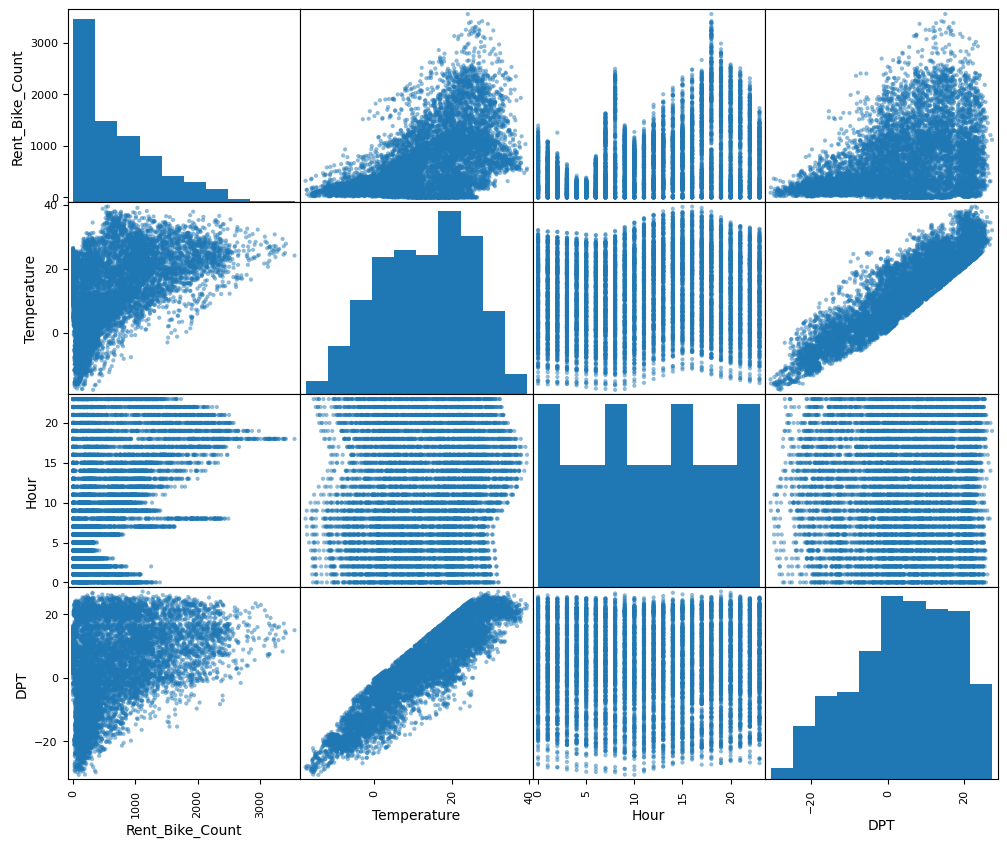

In [136]:
from pandas.plotting import scatter_matrix

attributes = ["Rent_Bike_Count", "Temperature", "Hour", "DPT"]
scatter_matrix(dummy_df[attributes], figsize=(12,10))
plt.show()

## Preparing Data

In [143]:
df = train_set.drop("Rent_Bike_Count", axis=1)
df_labels = train_set["Rent_Bike_Count"].copy()

## Encoding Text Categories (Testing)

In [144]:
df.isnull().any() # No need to use imputer

Date               False
Hour               False
Temperature        False
Humidity           False
Wind_speed         False
Visibility         False
DPT                False
Solar_Radiation    False
Rainfall           False
Snowfall           False
Seasons            False
Holiday            False
Functioning_Day    False
dtype: bool

In [145]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

df_text_cat = df[['Seasons','Holiday','Functioning_Day']]

df_text_1hot = cat_encoder.fit_transform(df_text_cat)

In [146]:
df_text_1hot

<7008x8 sparse matrix of type '<class 'numpy.float64'>'
	with 21024 stored elements in Compressed Sparse Row format>

In [147]:
df_text_1hot.toarray()

array([[0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [148]:
cat_encoder.feature_names_in_

array(['Seasons', 'Holiday', 'Functioning_Day'], dtype=object)

In [149]:
cat_encoder.get_feature_names_out()

array(['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning_Day_No', 'Functioning_Day_Yes'], dtype=object)

## Scaling Data and Testing a Prediction (Testing)

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

pretend_new_data = df[["Temperature"]].iloc[:5]

model.fit(df[["Temperature"]], df_labels)
predictions = model.predict(pretend_new_data)

In [151]:
predictions

array([ 674.45575984,  477.22105357,  375.70319005, 1147.23895281,
        961.60628808])

## Transforming the Data with Pipelines

In [162]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Binarizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [213]:
class DateSplitterTransformer(BaseEstimator, TransformerMixin):
  """
  Splits a date column into three columns: year, month, and day.
  """

  def __init__(self):
    pass

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    """
    Splits the date column into three columns: year, month, and day.
    """
    # Convert the date column into a datetime object
    X["year"] = pd.to_datetime( X["Date"], dayfirst=True).dt.year
    X["month"] = pd.to_datetime(X["Date"], dayfirst=True).dt.month
    X["day"] = pd.to_datetime(X["Date"], dayfirst=True).dt.day

    return X[[
        "year",
        "month",
        "day"
    ]]

  def get_feature_names_out(self, input_column_name):
    """
    Returns the names of the output features.
    """
    return ["year", "month", "day"]

In [214]:
default_num_pipeline = make_pipeline(
    StandardScaler()
)
log1p_pipeline = make_pipeline(
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler()
)
visibility_to_cat_pipeline = make_pipeline(
    Binarizer(threshold=1999)
)
solar_radiation_to_cat_pipeline = make_pipeline(
    Binarizer(threshold=0.56911)
)
rainfall_to_cat_pipeline = make_pipeline(
    Binarizer(threshold=0.148687)
)
snowfall_to_cat_pipeline = make_pipeline(
    Binarizer(threshold=0.075068)
)
text_to_cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)
date_split_pipeline = make_pipeline(
    DateSplitterTransformer(),
    StandardScaler()
)

In [215]:
pipelines = [default_num_pipeline, log1p_pipeline, visibility_to_cat_pipeline, solar_radiation_to_cat_pipeline, rainfall_to_cat_pipeline, snowfall_to_cat_pipeline, text_to_cat_pipeline, date_split_pipeline]
for pipeline in pipelines:
  print(pipeline)

Pipeline(steps=[('standardscaler', StandardScaler())])
Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<ufunc 'log1p'>)),
                ('standardscaler', StandardScaler())])
Pipeline(steps=[('binarizer', Binarizer(threshold=1999))])
Pipeline(steps=[('binarizer', Binarizer(threshold=0.56911))])
Pipeline(steps=[('binarizer', Binarizer(threshold=0.148687))])
Pipeline(steps=[('binarizer', Binarizer(threshold=0.075068))])
Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])
Pipeline(steps=[('datesplittertransformer', DateSplitterTransformer()),
                ('standardscaler', StandardScaler())])


In [216]:
from sklearn.compose import ColumnTransformer

default_num_attributes = ['Hour', 'Temperature', 'Humidity', 'DPT', 'Wind_speed']
log1p_num_attributes = ['Wind_speed']
visibility_attributes = ['Visibility']
solar_radiation_attributes = ['Solar_Radiation']
rainfall_attributes = ['Rainfall']
snowfall_attributes = ['Snowfall']
text_to_cat_attributes = ['Seasons', 'Holiday', 'Functioning_Day']
date_attributes = ['Date']

preprocessing = ColumnTransformer([
    ("default_num", default_num_pipeline, default_num_attributes),
    ("text_to_cat", text_to_cat_pipeline, text_to_cat_attributes),
    ("log1p_num", log1p_pipeline, log1p_num_attributes),
    ("visibility", visibility_to_cat_pipeline, visibility_attributes),
    ("solar_radiation", solar_radiation_to_cat_pipeline, solar_radiation_attributes),
    ("rainfall", rainfall_to_cat_pipeline, rainfall_attributes),
    ("snowfall", snowfall_to_cat_pipeline, snowfall_attributes),
    ("date", date_split_pipeline, date_attributes),
])

In [217]:
df_prepared = preprocessing.fit_transform(df)
df_prepared.shape

(7008, 21)

In [218]:
preprocessing.get_feature_names_out()

array(['default_num__Hour', 'default_num__Temperature',
       'default_num__Humidity', 'default_num__DPT',
       'default_num__Wind_speed', 'text_to_cat__Seasons_Autumn',
       'text_to_cat__Seasons_Spring', 'text_to_cat__Seasons_Summer',
       'text_to_cat__Seasons_Winter', 'text_to_cat__Holiday_Holiday',
       'text_to_cat__Holiday_No Holiday',
       'text_to_cat__Functioning_Day_No',
       'text_to_cat__Functioning_Day_Yes', 'log1p_num__Wind_speed',
       'visibility__Visibility', 'solar_radiation__Solar_Radiation',
       'rainfall__Rainfall', 'snowfall__Snowfall', 'date__year',
       'date__month', 'date__day'], dtype=object)

## Training Different Model (Testing)

In [219]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(df, df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('default_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'DPT',
                                                   'Wind_speed']),
                                                 ('text_to_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning_Day']),
                                                 ('log1p_num',
                                                  Pipeline(steps...
                                                  ['Solar_Radiation']),
                                                 ('rainfall',
                                                  Pipeline(steps=[('binarizer',
                                                                   Binarizer(threshold=0.148687))]),
                                                  ['Rainfall']),
                                                 ('snowfall',
                                                  Pipeline(steps=[('binarizer',
                                                                   Binarizer(threshold=0.075068))]),
                                                  ['Snowfall']),
                                                 ('date',
                                                  Pipeline(steps=[('datesplittertransformer',
                                                                   DateSplitterTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Date'])])),
                ('linearregression', LinearRegression())])

In [220]:
bike_rental_predictions = lin_reg.predict(df)
bike_rental_predictions[:5].round()

array([552., 553., 440., 918., 831.])

In [221]:
df_labels.iloc[:5].values

array([1933,  592,  265,  363,  345])

In [222]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(df_labels, bike_rental_predictions,
                              squared=False)
lin_rmse

424.12146515690864

In [223]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(df, df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('default_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Hour', 'Temperature',
                                                   'Humidity', 'DPT',
                                                   'Wind_speed']),
                                                 ('text_to_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Seasons', 'Holiday',
                                                   'Functioning_Day']),
                                                 ('log1p_num',
                                                  Pipeline(steps...
                                                  Pipeline(steps=[('binarizer',
                                                                   Binarizer(threshold=0.148687))]),
                                                  ['Rainfall']),
                                                 ('snowfall',
                                                  Pipeline(steps=[('binarizer',
                                                                   Binarizer(threshold=0.075068))]),
                                                  ['Snowfall']),
                                                 ('date',
                                                  Pipeline(steps=[('datesplittertransformer',
                                                                   DateSplitterTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Date'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [224]:
bike_rental_predictions = tree_reg.predict(df)
tree_rmse = mean_squared_error(df_labels, bike_rental_predictions,
                              squared=False)
tree_rmse

0.0

In [225]:
bike_rental_predictions[:5]

array([1933.,  592.,  265.,  363.,  345.])

In [226]:
df_labels.iloc[:5].values

array([1933,  592,  265,  363,  345])

In [227]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, df, df_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count     10.000000
mean     314.391177
std       21.150305
min      275.716708
25%      299.088736
50%      319.675842
75%      325.758645
max      346.420226
dtype: float64

## Finalizing a Model

In [236]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, df, df_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [237]:
pd.Series(forest_rmses).describe() # Lowest RMSES Mean, so best model in theory

count     10.000000
mean     222.811614
std       13.825385
min      198.231581
25%      216.345714
50%      220.053459
75%      226.283008
max      245.029455
dtype: float64

In [245]:
df2 = test_set.drop("Rent_Bike_Count", axis=1)
df2_labels = test_set["Rent_Bike_Count"].copy()

final_model = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
final_model.fit(df, df_labels)

final_predictions = final_model.predict(df2)
final_rmse = mean_squared_error(df2_labels, final_predictions, squared=False)
print(final_rmse) # Lowest RMSE, so best model in theory

233.7678893031187


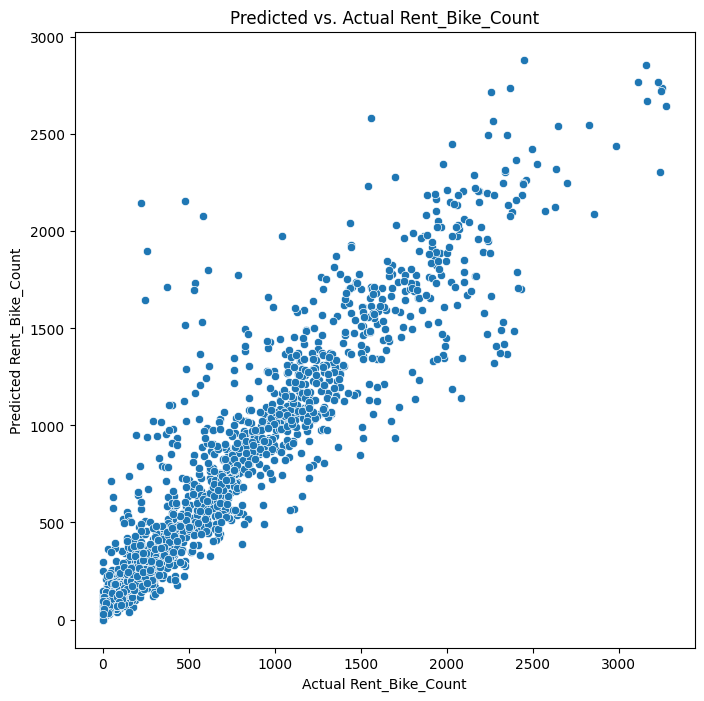

In [252]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=df2_labels, y=final_predictions)
plt.xlabel("Actual Rent_Bike_Count")
plt.ylabel("Predicted Rent_Bike_Count")
plt.title("Predicted vs. Actual Rent_Bike_Count")
plt.show()